In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

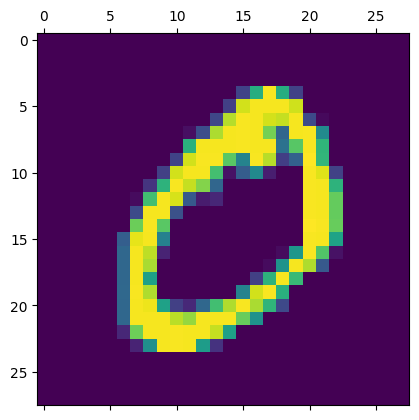

In [6]:
plt.matshow(x_train[1])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

model.fit(x_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 20.3278 - accuracy: 0.1184
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 20.2785 - accuracy: 0.1235
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 20.2776 - accuracy: 0.1289
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 20.2775 - accuracy: 0.1318
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 20.2774 - accuracy: 0.1292


In [45]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 20.2422 - accuracy: 0.1253


[20.242246627807617, 0.12530000507831573]

In [46]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


In [47]:
np.argmax(y_predicted[1])

1

In [48]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [49]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[788,  31,  22,  47,   5,  47,  12,  18,   5,   5],
       [ 59, 114, 140, 468,   0, 329,  21,   4,   0,   0],
       [656, 107,  90, 117,  11,  33,   4,   7,   6,   1],
       [633, 183,  38,  43,   3,  75,  19,   3,  12,   1],
       [385, 237, 123, 154,   2,  64,   9,   7,   0,   1],
       [449,  94,  28, 145,   2, 129,  15,  14,   7,   9],
       [623,  47,  62, 146,   7,  18,  52,   3,   0,   0],
       [392, 248,  15, 206,   3,  99,  27,  32,   4,   2],
       [730, 101,  39,  39,   4,  46,   7,   2,   2,   4],
       [535, 199,  27, 148,   2,  73,  19,   5,   0,   1]])>

Text(95.72222222222221, 0.5, 'truth')

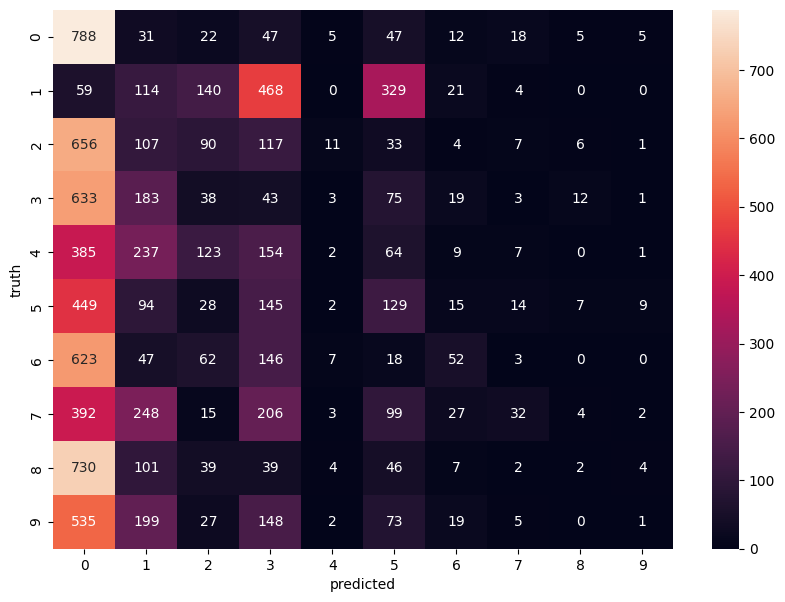

In [50]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'tanh'),
    keras.layers.Dense(50, activation = 'tanh'),
    keras.layers.Dense(25, activation = 'tanh'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flat, y_train, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2863 - accuracy: 0.9208
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1236 - accuracy: 0.9626
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0869 - accuracy: 0.9743
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0663 - accuracy: 0.9792
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0542 - accuracy: 0.9834
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0436 - accuracy: 0.9864


In [24]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9757


[0.08248453587293625, 0.9757000207901001]

In [25]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 1s 3ms/step


In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [27]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    0,    2,    2,   10,    3,    4,    3],
       [   0, 1128,    2,    0,    0,    0,    1,    1,    3,    0],
       [   1,    1, 1002,    3,    5,    0,    2,    5,   13,    0],
       [   0,    0,    7,  975,    0,    3,    1,   10,   10,    4],
       [   0,    0,    1,    0,  970,    0,    2,    1,    1,    7],
       [   2,    0,    0,   13,    2,  858,    2,    0,   11,    4],
       [   0,    2,    0,    1,    7,    3,  940,    0,    5,    0],
       [   0,    4,   11,    1,    2,    0,    0,  998,    4,    8],
       [   0,    0,    1,    2,    4,    2,    3,    5,  954,    3],
       [   1,    5,    0,    4,   12,    1,    1,    5,    3,  977]])>

Text(95.72222222222221, 0.5, 'truth')

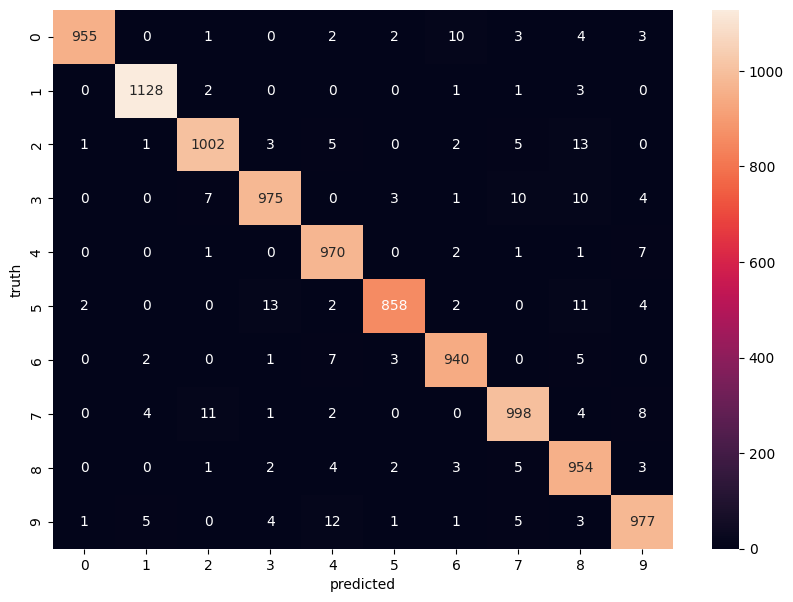

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

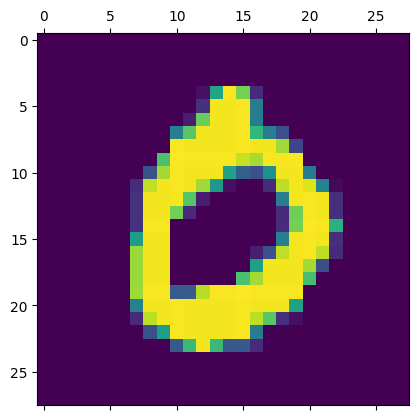

In [32]:
plt.matshow(x_test[3])

In [33]:
np.argmax(y_predicted[3])


0